<a href="https://colab.research.google.com/github/tranhuuan170302/demoCV/blob/main/demoPredictCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [189]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from textblob import TextBlob
from sklearn.tree import DecisionTreeClassifier
sns.set()

# Read file csv

In [190]:
df = pd.read_csv('/content/drive/MyDrive/topDev/data1.csv')






## Xem dữ liệu tổng quan

In [191]:
# xem thông tin dữ liệu bao gồm cột, số lượng dòng dữ liệu của các cột, kiểu dữ của các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          1973 non-null   int64 
 1   title               1973 non-null   object
 2   skill               1973 non-null   object
 3   address             1973 non-null   object
 4   skillAndExperience  1973 non-null   object
dtypes: int64(1), object(4)
memory usage: 77.2+ KB


In [192]:
# xe cấu trúc của dữ liệu và các giá trị của dữ liệu
df.head()

,Unnamed: 0,title,skill,address,skillAndExperience
0,0,".Net Developer (C#, Core)","[\n.NET\n\n, \nC#\n\n, \nASP.NET\n\n]","\nTầng 3, 4 CIC Tower, Số 2 ngõ 219 Trung Kính...",\n\nCó từ ít nhất 1 năm kinh nghiệm trở lên\nT...
1,1,"Junior/Middle Backend Dev (.NET, C#)","[\n.NET\n\n, \nC#\n\n, \nSQL\n\n]","\n7 Floor, No. 1196 , 3/2 treet , Ward 8, Dist...","\nHọc vấn, Kinh nghiệm: - Tốt nghiệp Đại họ..."
2,2,10 .Net Developer (ASP.Net) - Up to 2000$,"[\n.NET\n\n, \nASP.NET\n\n, \nC#\n\n]","\n86-88 Dinh Tien Hoang, Binh Thanh, Ho Chi Mi...",\nMUST HAVE :\nA bachelor’s degree in a techni...
3,3,[All levels] Backend Developer (.Net/Golang),"[\n.NET\n\n, \nC#\n\n, \nGolang\n\n, \nFresher...","\n29 Đường Tân Thuận (Tòa nhà FPT Tân Thuận), ...",\n\nHave knowledge in the following technologi...
4,4,.NET Developer (ASP.NET; C#) Up to 2200$,"[\n.NET\n\n, \nC#\n\n, \nASP.NET\n\n]","\nDuy Tan, Cau Giay, Ha Noi\nSee map\n\n",\n\nLập trình thành thạo với ngôn ngữ C#\nCó k...


In [193]:
# số lượng dữ liệu bị khuyết thiếu ở các cột
df.isna().sum()

Unnamed: 0            0
title                 0
skill                 0
address               0
skillAndExperience    0
dtype: int64

### Xóa hết tất cả các dữ liệu bị khuyết thiếu

In [194]:
df.dropna(inplace = True)

# Clean data

In [195]:
df['title'] = df['title'].str.lower()
df['skill'] = df['skill'].str.lower()
df['address'] = df['address'].str.lower()
df['skillAndExperience'] = df['skillAndExperience'].str.lower()

In [196]:
df['title1'] = df['title']

In [197]:
df.head()

,Unnamed: 0,title,skill,address,skillAndExperience,title1
0,0,".net developer (c#, core)","[\n.net\n\n, \nc#\n\n, \nasp.net\n\n]","\ntầng 3, 4 cic tower, số 2 ngõ 219 trung kính...",\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...,".net developer (c#, core)"
1,1,"junior/middle backend dev (.net, c#)","[\n.net\n\n, \nc#\n\n, \nsql\n\n]","\n7 floor, no. 1196 , 3/2 treet , ward 8, dist...","\nhọc vấn, kinh nghiệm: - tốt nghiệp đại họ...","junior/middle backend dev (.net, c#)"
2,2,10 .net developer (asp.net) - up to 2000$,"[\n.net\n\n, \nasp.net\n\n, \nc#\n\n]","\n86-88 dinh tien hoang, binh thanh, ho chi mi...",\nmust have :\na bachelor’s degree in a techni...,10 .net developer (asp.net) - up to 2000$
3,3,[all levels] backend developer (.net/golang),"[\n.net\n\n, \nc#\n\n, \ngolang\n\n, \nfresher...","\n29 đường tân thuận (tòa nhà fpt tân thuận), ...",\n\nhave knowledge in the following technologi...,[all levels] backend developer (.net/golang)
4,4,.net developer (asp.net; c#) up to 2200$,"[\n.net\n\n, \nc#\n\n, \nasp.net\n\n]","\nduy tan, cau giay, ha noi\nsee map\n\n",\n\nlập trình thành thạo với ngôn ngữ c#\ncó k...,.net developer (asp.net; c#) up to 2200$


In [198]:
# xóa hết tất cả có kí tự số trong cột title
df['title'] = df['title'].str.replace('\d+',' ')
# xóa hết các kí tự đặc biệt trong cột title
df['title'] = df['title'].str.replace(r'[(,),$+]',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [199]:
df['title'].unique()

array(['.net developer  c#  core ',
       'junior/middle backend dev  .net  c# ',
       '  .net developer  asp.net  - up to   ',
       '[all levels] backend developer  .net/golang ',
       '.net developer  asp.net; c#  up to   ',
       '.net developer  .netcore  c# ',
       '  mid-level asp.net dev  .net  reactjs  ~   ',
       '  c# developers  .net  asp.net  - all levels',
       '.net developer  all levels ',
       '.net developers  junior to senior ',
       '  full-stack .net developer ~   ',
       'fresher/junior developer  java/.net/javascript  ~ m',
       'back-end dev  .net  api  mysql  - sign on bonus',
       'senior level - .net developer  sql/c#  upto   ',
       '.net developer  c#  asp.net ',
       'backend dev   .net  c#   sql  ~  ',
       'software developer  java  .net  c/c   ',
       '.net/java/nodejs backend developer ~ m',
       '  fresher web developer  .net / c# / oop ',
       '.net core developer  asp.net  c#   nha trang ',
       'salesforce devel

In [200]:
df['title'] = df['title'].str.replace('dev ', 'developer ')
df['title'] = df['title'].str.replace('dev$', 'developer')
df['title'] = df['title'].str.replace('devs ', 'developer ')
df['title'] = df['title'].str.replace('system ', 'systems ')
df['title'] = df['title'].str.replace('test ', 'tester')
df['title'] = df['title'].str.replace('architecture', 'architect ')
df['title'] = df['title'].str.replace('design', 'designer ')
df['title'] = df['title'].str.replace('games ', 'game ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [201]:
# tạo một list chứa các danh sách các nghề trong it
listJob = ['Computer Programmer', 'product',
'Database Administrator',
'Web Developer', 'tester',
'Information security','Computer security','Computer network','Systems','Data science','Network administrator','systems analyst','Technical Support',
'Information technology management','Engineer','Network Engineer','Technician','Manager','python',
'Network and Computer Systems Administrators','Business intelligence','Software engineering', 'scrum master',
'Computer hardware engineer','Computer Support Specialists','it service management','business analysis','security',
'Data analysis','Network architecture','Data Scientist','mobile developer','kỹ sư cầu nối', 'designer', 'services',
'Data Analyst','Computer scientist','Director','Software Architect','Webmaster','Cloud computing', 'application', 'devops', 
'Computer repair technician','Management information system','Computer and Information Research Scientists','Video game design','IT Consultant','Architecture','Web design','game developer','Computing',
'Business Analyst','User experience design','Information systems technicial','Frontend','Java',
'Software', 'Computer forensics', 'Computer and Information Systems Managers','Web development', 'architect', 'Product Management', 'ios developer', 'mobile', 'net developer', 'backend', 'developer']

In [202]:
def getType(string):
  result = None
  for job in listJob:
    job = job.lower()
   
    index = string.find(job) 
    
    if index >= 0:
      result = job
      break
  return result

In [203]:
df['types'] = df['title'].apply(lambda string: getType(string))

In [204]:
df['types'].unique()

array(['net developer', 'backend', 'developer', 'java', 'web developer',
       'software', 'python', 'application', 'mobile', 'mobile developer',
       'game developer', 'ios developer', 'frontend', 'engineer',
       'kỹ sư cầu nối', 'business analyst', 'product', 'systems',
       'data analyst', 'business intelligence', 'manager', 'tester',
       'software architect', 'it service management', 'business analysis',
       'services', None, 'scrum master', 'devops', 'data scientist',
       'architect', 'director', 'information security', 'security',
       'technical support', 'designer'], dtype=object)

In [205]:
df['types'].value_counts()

java                     504
developer                213
frontend                 152
engineer                 148
python                   148
tester                   137
backend                  101
web developer             88
product                   87
business analyst          68
manager                   57
net developer             50
mobile developer          36
systems                   28
mobile                    19
designer                  16
software                  16
ios developer             14
software architect        13
game developer            11
scrum master               8
architect                  6
security                   4
it service management      4
services                   4
information security       3
kỹ sư cầu nối              3
application                3
data analyst               3
devops                     2
director                   2
business intelligence      2
data scientist             1
technical support          1
business analy

In [206]:
len(df['types'].unique())

36

In [207]:
df.dropna(inplace = True)

#### chia cắt các skil trong cột skill.

In [208]:
df.head()

,Unnamed: 0,title,skill,address,skillAndExperience,title1,types
0,0,.net developer c# core,"[\n.net\n\n, \nc#\n\n, \nasp.net\n\n]","\ntầng 3, 4 cic tower, số 2 ngõ 219 trung kính...",\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...,".net developer (c#, core)",net developer
1,1,junior/middle backend developer .net c#,"[\n.net\n\n, \nc#\n\n, \nsql\n\n]","\n7 floor, no. 1196 , 3/2 treet , ward 8, dist...","\nhọc vấn, kinh nghiệm: - tốt nghiệp đại họ...","junior/middle backend dev (.net, c#)",backend
2,2,.net developer asp.net - up to,"[\n.net\n\n, \nasp.net\n\n, \nc#\n\n]","\n86-88 dinh tien hoang, binh thanh, ho chi mi...",\nmust have :\na bachelor’s degree in a techni...,10 .net developer (asp.net) - up to 2000$,net developer
3,3,[all levels] backend developer .net/golang,"[\n.net\n\n, \nc#\n\n, \ngolang\n\n, \nfresher...","\n29 đường tân thuận (tòa nhà fpt tân thuận), ...",\n\nhave knowledge in the following technologi...,[all levels] backend developer (.net/golang),backend
4,4,.net developer asp.net; c# up to,"[\n.net\n\n, \nc#\n\n, \nasp.net\n\n]","\nduy tan, cau giay, ha noi\nsee map\n\n",\n\nlập trình thành thạo với ngôn ngữ c#\ncó k...,.net developer (asp.net; c#) up to 2200$,net developer


In [209]:
# hàm dùng để xóa các kí tự đặc biệt như \n, [,], .....
def removeCharacter(ColName, character, dataFrame):
  return dataFrame[ColName].str.replace(character, '')

In [210]:
df['skill'] = removeCharacter('skill', '\n', df)
df['skill'] = removeCharacter('skill', '[', df)
df['skill'] = removeCharacter('skill', ']', df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [211]:
dataSkill = df[['Unnamed: 0', 'skill']]

In [212]:
# phân chuỗi trong cột skill ra list rồi thực chia theo cột unnamed: 0
skill = pd.DataFrame(dataSkill.set_index('Unnamed: 0').skill.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()

In [213]:
# đổi tên cột 0 trong dataFrame skill thành 'skill_cut'
skill.rename(columns = {0:'skill_cut'}, inplace = True)

In [214]:
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
df = df.merge(skill, left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')

In [215]:
# xem data mẫu
df.head()

,Unnamed: 0,title,skill,address,skillAndExperience,title1,types,skill_cut
0,0,.net developer c# core,".net, c#, asp.net","\ntầng 3, 4 cic tower, số 2 ngõ 219 trung kính...",\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...,".net developer (c#, core)",net developer,.net
1,0,.net developer c# core,".net, c#, asp.net","\ntầng 3, 4 cic tower, số 2 ngõ 219 trung kính...",\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...,".net developer (c#, core)",net developer,c#
2,0,.net developer c# core,".net, c#, asp.net","\ntầng 3, 4 cic tower, số 2 ngõ 219 trung kính...",\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...,".net developer (c#, core)",net developer,asp.net
3,1,junior/middle backend developer .net c#,".net, c#, sql","\n7 floor, no. 1196 , 3/2 treet , ward 8, dist...","\nhọc vấn, kinh nghiệm: - tốt nghiệp đại họ...","junior/middle backend dev (.net, c#)",backend,.net
4,1,junior/middle backend developer .net c#,".net, c#, sql","\n7 floor, no. 1196 , 3/2 treet , ward 8, dist...","\nhọc vấn, kinh nghiệm: - tốt nghiệp đại họ...","junior/middle backend dev (.net, c#)",backend,c#


In [216]:
# xem thông tin data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5914 entries, 0 to 5913
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5914 non-null   int64 
 1   title               5914 non-null   object
 2   skill               5914 non-null   object
 3   address             5914 non-null   object
 4   skillAndExperience  5914 non-null   object
 5   title1              5914 non-null   object
 6   types               5914 non-null   object
 7   skill_cut           5914 non-null   object
dtypes: int64(1), object(7)
memory usage: 415.8+ KB


In [217]:
df['skill_cut'].unique()

array(['.net', 'c#', 'asp.net', 'sql', 'golang', 'fresher accepted',
       'nodejs', 'reactjs', 'mysql', 'java', 'javascript', 'oop',
       'c language', 'php', 'mvc', 'cloud', 'angular', 'english',
       'python', 'html5', 'oracle', 'database', 'c++', 'erp', 'angularjs',
       'android', 'swift', 'flutter', 'ios', 'kotlin', 'react native',
       'unity', 'games', 'json', 'software architect', 'spring',
       'laravel', 'aws', 'system engineer', 'agile', 'postgresql',
       'nosql', 'django', 'devops', 'typescript', 'ruby', 'scala',
       'blockchain', 'j2ee', 'wordpress', 'css', 'ruby on rails',
       'bridge engineer', 'japanese', 'project manager',
       'business analyst', 'system admin', 'networking', 'qa qc',
       'product manager', 'ui-ux', 'tester', 'data analyst', 'scrum',
       'manager', 'team leader', 'linux', 'embedded', 'vuejs', 'magento',
       'jquery', 'objective c', 'sap', 'it support', 'designer'],
      dtype=object)

#### chia cắt và xử lí cột address

In [218]:
df['address'] = removeCharacter('address', '\n', df)

In [219]:
# hàm chia cắt để lấy thành phố
def cutAddressStringCity(string, num):
  try:
    lstArr = string.split(',')
    result = lstArr[len(lstArr)-num]
  except:
    result = string
  return result

In [220]:
# cắt để lấy các thành phố
df['City'] = df['address'].apply(lambda st: cutAddressStringCity(st, 1))
# Cắt để lấy tên các quận
df['District'] = df['address'].apply(lambda st: cutAddressStringCity(st, 2))

In [221]:
# xem các giá trị unique của thành phố
df['City'].unique()

array([' ha noisee map', ' ho chi minhsee map', ' nha trangsee map',
       ' da nangsee map', ' bình dươngsee map', 'remotesee map',
       'work from homesee map', 'ho chi minhsee map', ' 228208see map',
       ' hải phòngsee map'], dtype=object)

In [222]:
# xóa các từ không cần thiết trong cột City
df['City'] = df['City'].str.replace('see map', '')

In [223]:
# xem các giá trị unique của quận
df['District'].unique()

array([' cau giay', ' district 11', ' binh thanh', ' district 7',
       ' ba dinh', ' nam tu liem', ' thanh xuan', ' tan binh', ' dong da',
       ' district 4', ' hai ba trung', ' phuoc hai ward', ' phu nhuan',
       ' district 1', ' district 5', ' district 3', ' hoai duc',
       ' hai chau', ' district 10', ' hoang mai', ' thu duc city',
       ' hoan kiem', ' thị xã tân uyên', ' tay ho', ' district 12',
       ' other', ' district 2', ' go vap', ' district 9', ' ha dong',
       ' lien chieu', 'remotesee map', ' bac tu liem', 'district 1',
       ' tan phu', ' thanh khe', 'work from homesee map', ' cam le',
       ' district 6', ' thu duc', ' district 8', 'ho chi minhsee map',
       'remote', ' ngu hanh son', ' quận ba đình', 'ha noi', ' nha be',
       ' son tra', ' singapore', ' hải an'], dtype=object)

In [224]:
# Xóa các từ không cần thiết trong cột District
df['District'] = df['District'].str.replace('see map', '')

#### chọn các level trong từng giá trị từ title 

In [225]:
lstStringLevel = ['fres', 'jun', 'sr', 'rem', 'mid', 'sen', 'all lev']

In [226]:
def replaceStringTitleLevel(string):
    result = 'not experience'
    string = string.lower()
    for i in lstStringLevel:
        x = i+'\S+'
        sts = re.findall(x, string)
        if len(sts) >=1:
          result = sts[0]   
    return result

In [227]:
df['experience'] = df['title'].apply(lambda st: replaceStringTitleLevel(st))

In [228]:
df['experience'].value_counts()

not experience       4383
senior                913
junior                110
sr.                    64
all levels             49
mid/sr                 45
middle                 42
remote                 39
all level              32
all levels]            21
all level-backend      20
fresher                19
senior/middle          18
remote]                16
senior/lead            16
mid/                   12
all level]             12
sr/team                12
senior/                12
mid/sr.                12
remote-fullstack        9
senior]                 9
remote/                 9
sr/mid                  6
senior/mid              6
sr/principal            6
junior/fresher          4
fresher]                4
fresher/jr              4
all level-              4
mid-level               3
remotely                3
Name: experience, dtype: int64

In [229]:
df['experience'] = df['experience'].str.replace(']', '')
df['experience'] = df['experience'].str.replace(')', '')
df['experience'] = df['experience'].str.replace(',', '')
df['experience'] = df['experience'].str.replace('.', '')
df['experience'] = df['experience'].str.replace('/$', '')
df['experience'] = df['experience'].str.replace('sr', 'senior')
df['experience'] = df['experience'].str.replace('levels', 'level')
df['experience'] = df['experience'].str.replace('fresh$', 'fresher')
df['experience'] = df['experience'].str.replace('mid$', 'middle')
df['experience'] = df['experience'].str.replace('mid/', 'middle/')
df['experience'] = df['experience'].str.replace('jr', 'junior')
df['experience'] = df['experience'].str.replace('lead$', 'leader')
df['experience'] = df['experience'].str.replace('-backend', '')
df['experience'] = df['experience'].str.replace('-3', '') 
df['experience'] = df['experience'].str.replace('-', '/') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex wil

In [230]:
df['experience'].value_counts()

not experience      4383
senior               998
all level            134
junior               110
remote                64
middle/senior         57
middle                54
senior/middle         30
fresher               23
senior/leader         16
senior/team           12
remote/fullstack       9
senior/principal       6
fresher/junior         4
junior/fresher         4
all level/             4
mid/level              3
remotely               3
Name: experience, dtype: int64

In [231]:
df['experience'] = df['experience'].str.replace('/$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [232]:
dfExperience = df[['Unnamed: 0', 'experience']].loc[df[['Unnamed: 0', 'experience']].duplicated() == True, :]

In [233]:
dfExperience.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 1 to 5913
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3961 non-null   int64 
 1   experience  3961 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.8+ KB


In [234]:
# phân chuỗi trong cột skill ra list rồi thực chia theo cột unnamed: 0
experience = pd.DataFrame(dfExperience.set_index('Unnamed: 0').experience.str.split('/', expand=True).stack().reset_index(level=1, drop=True)).reset_index()

In [235]:
experience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4055 entries, 0 to 4054
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4055 non-null   int64 
 1   0           4055 non-null   object
dtypes: int64(1), object(1)
memory usage: 63.5+ KB


In [236]:
# đổi tên cột 0 trong dataFrame skill thành 'experienceSub'
experience.rename(columns = {0:'experienceSub'}, inplace = True)

In [237]:
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
df = df.merge(experience, left_on = 'Unnamed: 0', right_on = 'Unnamed: 0')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12646 entries, 0 to 12645
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          12646 non-null  int64 
 1   title               12646 non-null  object
 2   skill               12646 non-null  object
 3   address             12646 non-null  object
 4   skillAndExperience  12646 non-null  object
 5   title1              12646 non-null  object
 6   types               12646 non-null  object
 7   skill_cut           12646 non-null  object
 8   City                12646 non-null  object
 9   District            12646 non-null  object
 10  experience          12646 non-null  object
 11  experienceSub       12646 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [239]:
df['experienceSub'].value_counts()

not experience    9144
senior            2220
all level          348
junior             318
middle             284
remote             142
fresher             90
leader              28
team                24
fullstack           18
principal           12
mid                  6
level                6
remotely             6
Name: experienceSub, dtype: int64

In [240]:
df.loc[df['experienceSub'] == 'not experience', ['experienceSub', 'skillAndExperience']]

,experienceSub,skillAndExperience
0,not experience,\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...
1,not experience,\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...
2,not experience,\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...
3,not experience,\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...
4,not experience,\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nt...
...,...,...
12641,not experience,"\n\ncó kinh nghiệm 2 năm trở lên về java, swif..."
12642,not experience,"\n\ncó kinh nghiệm 2 năm trở lên về java, swif..."
12643,not experience,"\n\ncó kinh nghiệm 2 năm trở lên về java, swif..."
12644,not experience,"\n\ncó kinh nghiệm 2 năm trở lên về java, swif..."


In [241]:
df['skillAndExperience'].unique()

array(['\n\ncó từ ít nhất 1 năm kinh nghiệm trở lên\nthành thạo .net (c#, asp.net), mvc5, sql server , postgresql server, css, angular javascript/jquery, html\ncó khả năng phân tích thiết kế hệ thống\nkỹ năng làm việc độc lập và theo nhóm tốt\ncó sản phẩm/ dự án cụ thể là một lợi thế\nưu tiên những ứng viên hiểu biết về google adwords api, , cache…\n\n',
       '\nhọc vấn, kinh nghiệm: \xa0\xa0\xa0- tốt nghiệp đại học/cao đẳng chuyên ngành công nghệ thông tin.- ít nhất 01 năm kinh nghiệm làm việc với ef, dapper, spring, mô hình mvc.- ít nhất 01 năm kinh nghiệm \xa0lập trình back-end (c#, .net core, webapi), \xa0winform, devexpress.ưu tiên:- ưu tiên có kinh nghiệm phát triển his, emr.- ưu tiên có kinh nghiệm về thiết kế csdl và làm việc với mssql/mysql/mongodb.\xa0kiến thức:- nắm vững quy trình phát triển phần mềm.- có kiến thức và tư duy lập trình hướng đối tượng (oop) và vững về cấu trúc dữ liệu, thuật toán. \xa0 \xa0 \xa0 \xa0\xa0kỹ năng & năng lực:\xa0 \xa0\xa0- chủ động, có trách n

In [242]:
df['skillAndExperience'] = df['skillAndExperience'].str.replace('\n', ' ')
df['skillAndExperience'] = df['skillAndExperience'].str.replace('+', ' ')
df['skillAndExperience'] = df['skillAndExperience'].str.replace('years', 'year')
df['skillAndExperience'] = df['skillAndExperience'].str.replace('  ', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [243]:
listExperience = ['year', 'năm']

In [244]:
def getTypeExperience(string):
  x = None
  result = None
  string = string.strip()
  for yea in listExperience:
    yea = yea.lower()
    text = '[0-9]+ '+ yea
    numbers = re.findall(text, string)
    try:
      if numbers[0] != None:
        x = numbers[0]
        arr = x.split(' ')
        
        if int(arr[0]) >= 2:
          result = 'senior'
        elif int(arr[0]) == 1:
          result = 'fresher'
        break
    except:
      result = 'not experience'
  return result

In [245]:
getTypeExperience('có ít nhất 1 year kinh nghiệm trong lĩnh vực kỹ thuật phần mềm trong môi trường hệ')

'fresher'

In [246]:
df.columns

Index(['Unnamed: 0', 'title', 'skill', 'address', 'skillAndExperience',
       'title1', 'types', 'skill_cut', 'City', 'District', 'experience',
       'experienceSub'],
      dtype='object')

In [247]:
df.loc[df['experienceSub'] == 'not experience', 'experienceSub'] = df.loc[df['experienceSub'] == 'not experience', 'skillAndExperience'].apply(lambda st: getTypeExperience(st))

In [248]:
df['experienceSub'].value_counts()

senior            7310
not experience    2340
fresher           1804
all level          348
junior             318
middle             284
remote             142
leader              28
team                24
fullstack           18
principal           12
mid                  6
level                6
remotely             6
Name: experienceSub, dtype: int64

# lấy data có giá trị

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12646 entries, 0 to 12645
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          12646 non-null  int64 
 1   title               12646 non-null  object
 2   skill               12646 non-null  object
 3   address             12646 non-null  object
 4   skillAndExperience  12646 non-null  object
 5   title1              12646 non-null  object
 6   types               12646 non-null  object
 7   skill_cut           12646 non-null  object
 8   City                12646 non-null  object
 9   District            12646 non-null  object
 10  experience          12646 non-null  object
 11  experienceSub       12646 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [250]:
data = df[['types', 'skill_cut', 'City', 'District', 'experienceSub']]

# Thực hiện trực quan hóa dữ liệu.

In [251]:
data['City'] =  data['City'].str.strip()
data['types'] =  data['types'].str.strip()
data['skill_cut'] =  data['skill_cut'].str.strip()
data['District'] =  data['District'].str.strip()
data['experienceSub'] =  data['experienceSub'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [252]:
data['City'].value_counts()

ho chi minh       7692
ha noi            4458
da nang            336
remote              62
nha trang           42
work from home      30
bình dương          18
228208               6
hải phòng            2
Name: City, dtype: int64

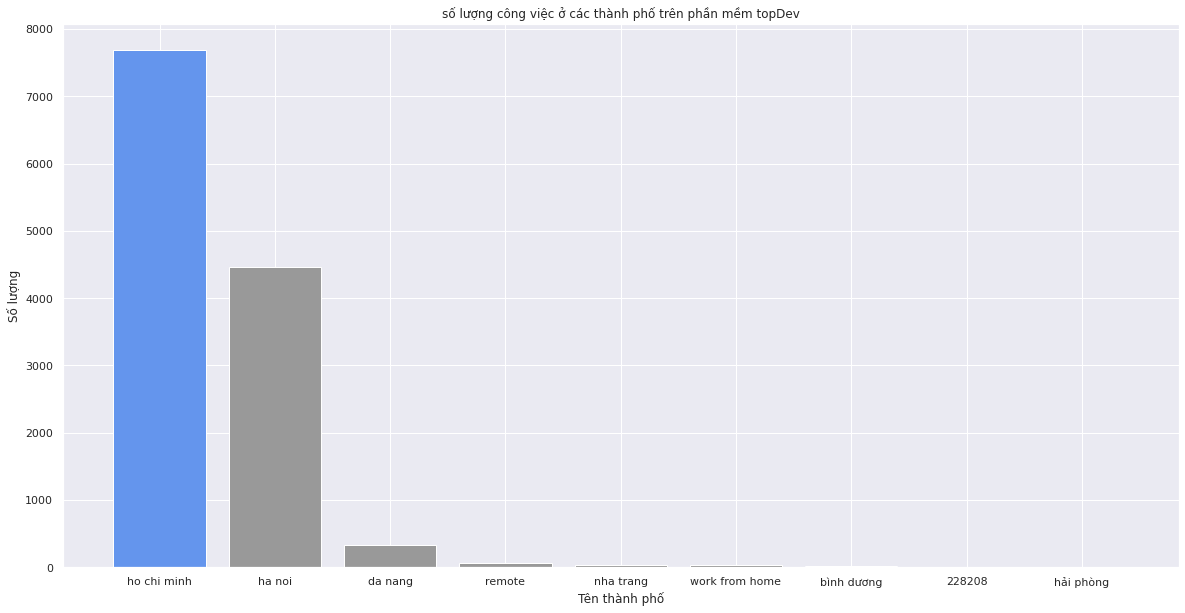

In [253]:
my_colors = ['#6495ED','#999999', '#999999', '#999999', '#999999', '#999999']

fig = plt.figure(figsize = (20,10))
plt.bar(data['City'].value_counts().index, data['City'].value_counts().values, color=my_colors)
plt.title('số lượng công việc ở các thành phố trên phần mềm topDev')
plt.ylabel('Số lượng')
plt.xlabel('Tên thành phố')
plt.show()

#### trực quan hóa dữ liệu District

In [254]:
data['District'].unique()

array(['cau giay', 'district 11', 'binh thanh', 'district 7', 'ba dinh',
       'nam tu liem', 'thanh xuan', 'tan binh', 'dong da', 'district 4',
       'hai ba trung', 'phuoc hai ward', 'phu nhuan', 'district 1',
       'district 5', 'district 3', 'hoai duc', 'hai chau', 'district 10',
       'hoang mai', 'thu duc city', 'hoan kiem', 'thị xã tân uyên',
       'tay ho', 'district 12', 'other', 'district 2', 'go vap',
       'district 9', 'ha dong', 'lien chieu', 'remote', 'bac tu liem',
       'tan phu', 'thanh khe', 'work from home', 'cam le', 'district 6',
       'thu duc', 'district 8', 'ho chi minh', 'ngu hanh son',
       'quận ba đình', 'ha noi', 'nha be', 'son tra', 'singapore',
       'hải an'], dtype=object)

In [255]:
data.drop(index = data.loc[(data['District'] == 'ho chi minh') | (data['District'] == 'ha noi') | (data['District'] == '.'), :].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [256]:
data['District'] = data['District'].str.replace('Thu Duc city', 'Thu Duc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [257]:
ITHCM = data.loc[data['City'] == 'ho chi minh', :]

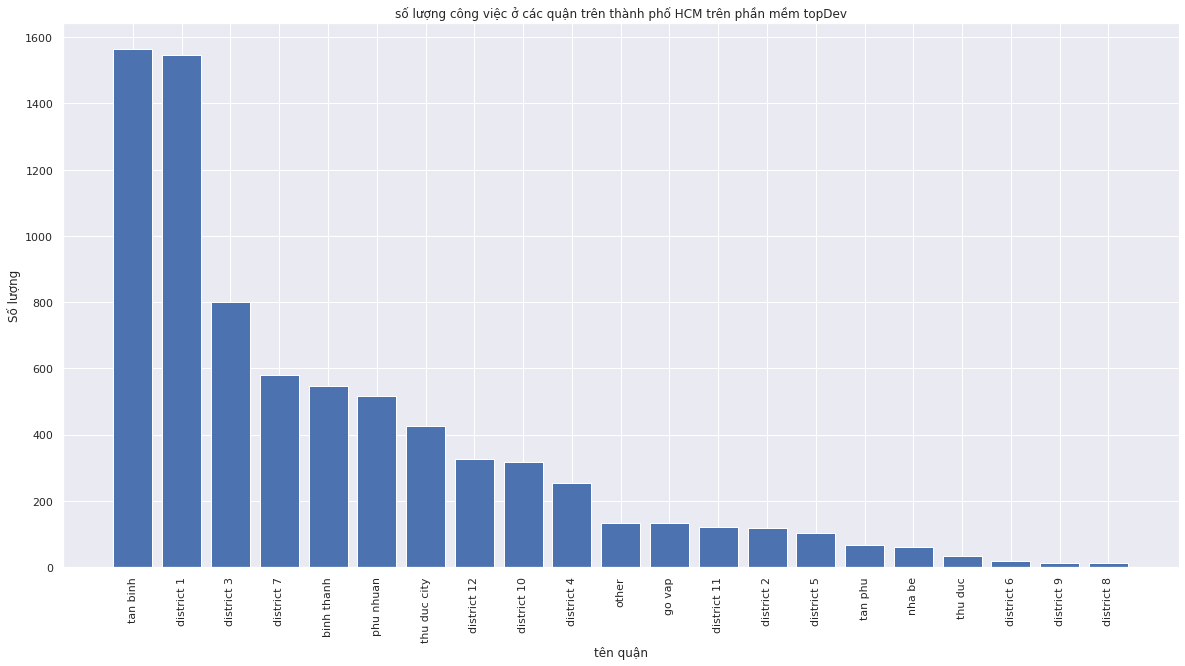

In [258]:
fig = plt.figure(figsize = (20,10))
plt.bar(ITHCM['District'].value_counts().index, ITHCM['District'].value_counts().values)
plt.xticks(rotation=90)
plt.title('số lượng công việc ở các quận trên thành phố HCM trên phần mềm topDev')
plt.ylabel('Số lượng')
plt.xlabel('tên quận')
plt.show()

#### trực quan hóa kinh nghiệm trong experience

In [259]:
data['experienceSub'].value_counts()

senior            7292
not experience    2340
fresher           1804
all level          348
junior             318
middle             284
remote             142
leader              28
team                24
fullstack           18
principal           12
mid                  6
level                6
remotely             6
Name: experienceSub, dtype: int64

In [260]:
data.drop(index = data.loc[data['experienceSub'] == 'hybrid', :].index, inplace = True)

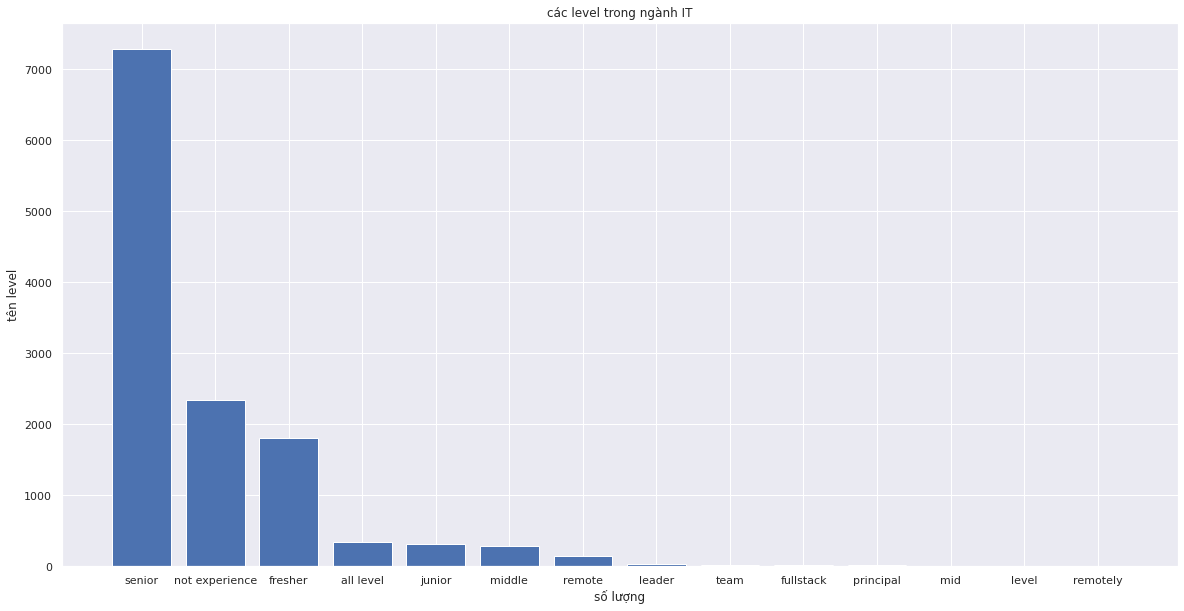

In [261]:
fig = plt.figure(figsize = (20,10))
plt.bar(data['experienceSub'].value_counts().index, data['experienceSub'].value_counts().values)
plt.title('các level trong ngành IT')
plt.xlabel('số lượng')
plt.ylabel('tên level')
plt.show()

#### Trực quan hóa các kĩ năng

In [262]:
ITHCM['skill_cut'].value_counts()

java                671
javascript          453
reactjs             405
nodejs              329
fresher accepted    322
                   ... 
json                  8
it support            8
magento               7
jquery                4
sap                   2
Name: skill_cut, Length: 75, dtype: int64

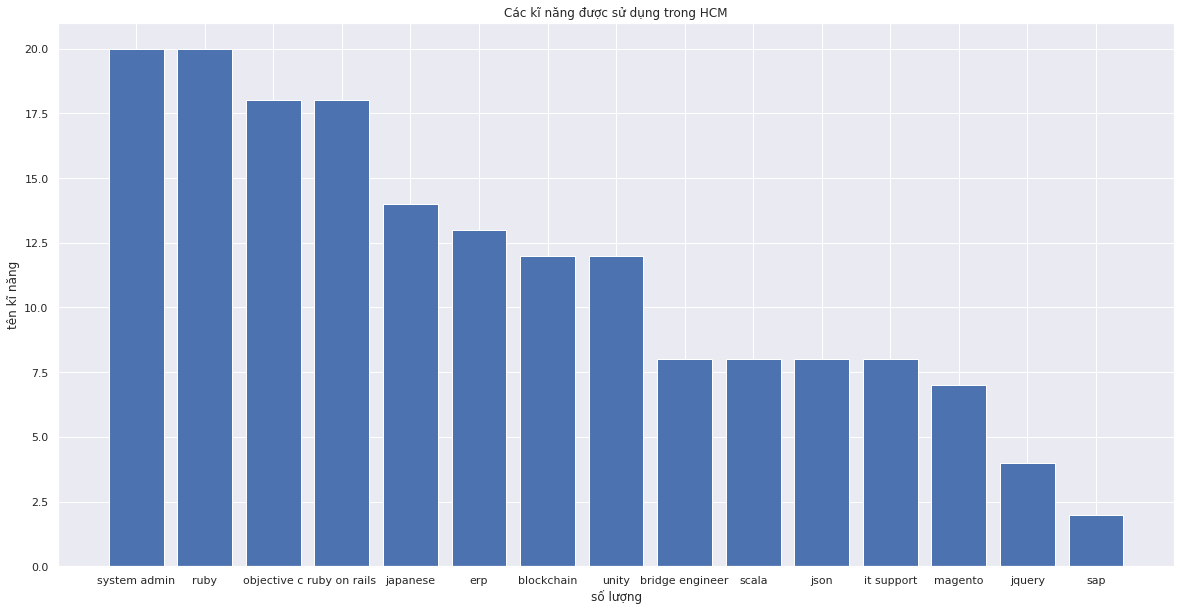

In [263]:
fig = plt.figure(figsize = (20,10))
plt.bar(ITHCM['skill_cut'].value_counts().index[60:], ITHCM['skill_cut'].value_counts().values[60:])
plt.title('Các kĩ năng được sử dụng trong HCM')
plt.ylabel('tên kĩ năng')
plt.xlabel('số lượng')
plt.show()

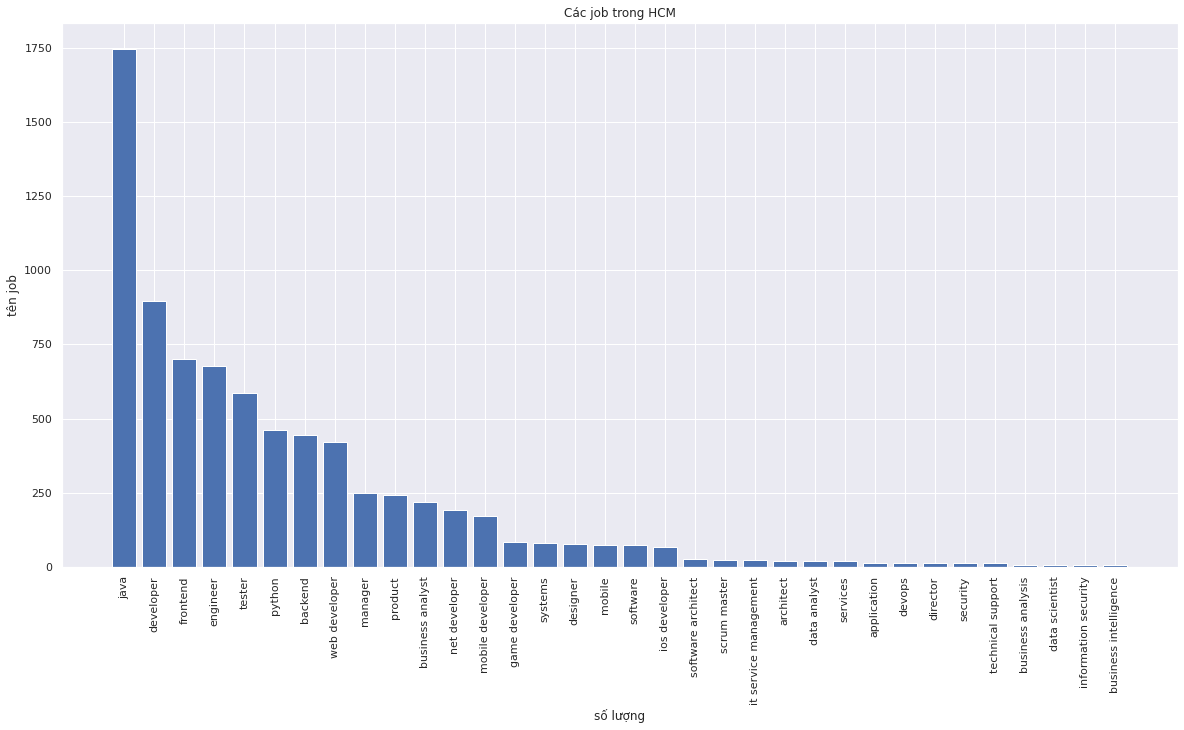

In [264]:
fig = plt.figure(figsize = (20,10))
plt.bar(ITHCM['types'].value_counts().index, ITHCM['types'].value_counts().values)
plt.title('Các job trong HCM')
plt.ylabel('tên job')
plt.xlabel('số lượng')
plt.xticks(rotation=90)
plt.show()

# Thực hiện One-hot encoding

In [265]:
dataTrain = data.copy()

In [266]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 0 to 12645
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   types          12628 non-null  object
 1   skill_cut      12628 non-null  object
 2   City           12628 non-null  object
 3   District       12628 non-null  object
 4   experienceSub  12628 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [267]:
dataTrain["types"] = dataTrain["types"].astype('category')
dataTrain["skill_cut"] = dataTrain["skill_cut"].astype('category')
dataTrain["City"] = dataTrain["City"].astype('category')
dataTrain["District"] = dataTrain["District"].astype('category')
dataTrain["experienceSub"] = dataTrain["experienceSub"].astype('category')

In [268]:
dataTrain["types_codes"] = dataTrain["types"].cat.codes
dataTrain["skill_cut_codes"] = dataTrain["skill_cut"].cat.codes
dataTrain["City_codes"] = dataTrain["City"].cat.codes
dataTrain["District_codes"] = dataTrain["District"].cat.codes
dataTrain["experienceSub_codes"] = dataTrain["experienceSub"].cat.codes

In [269]:
# xem các giá trị đã chuyển sang dạng code
def CodeData(name1, name2, dataTrain):
  return  dataTrain[[name1, name2]].loc[dataTrain[[name1, name2]].duplicated() == False, :]

In [270]:
CodeData('types', 'types_codes', dataTrain).head(5)

,types,types_codes
0,net developer,23
6,backend,2
54,developer,9
90,java,18
150,web developer,34


# lấy các dữ liệu code

In [271]:
dataTrain1 = dataTrain[['types_codes', 'skill_cut_codes', 'City_codes','District_codes', 'experienceSub_codes']]

In [272]:
dataTrain1.head()

,types_codes,skill_cut_codes,City_codes,District_codes,experienceSub_codes
0,23,0,3,4,1
1,23,0,3,4,1
2,23,11,3,4,1
3,23,11,3,4,1
4,23,5,3,4,1


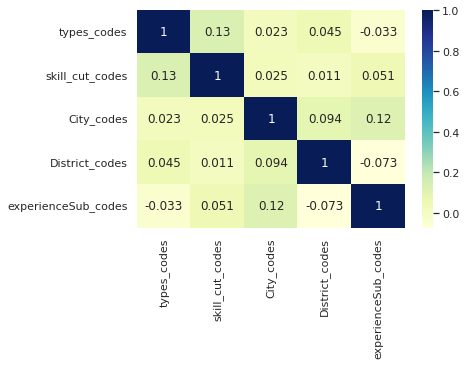

In [273]:
# plotting correlation heatmap
dataplot = sns.heatmap(dataTrain1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# Chuẩn hóa dữ liệu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


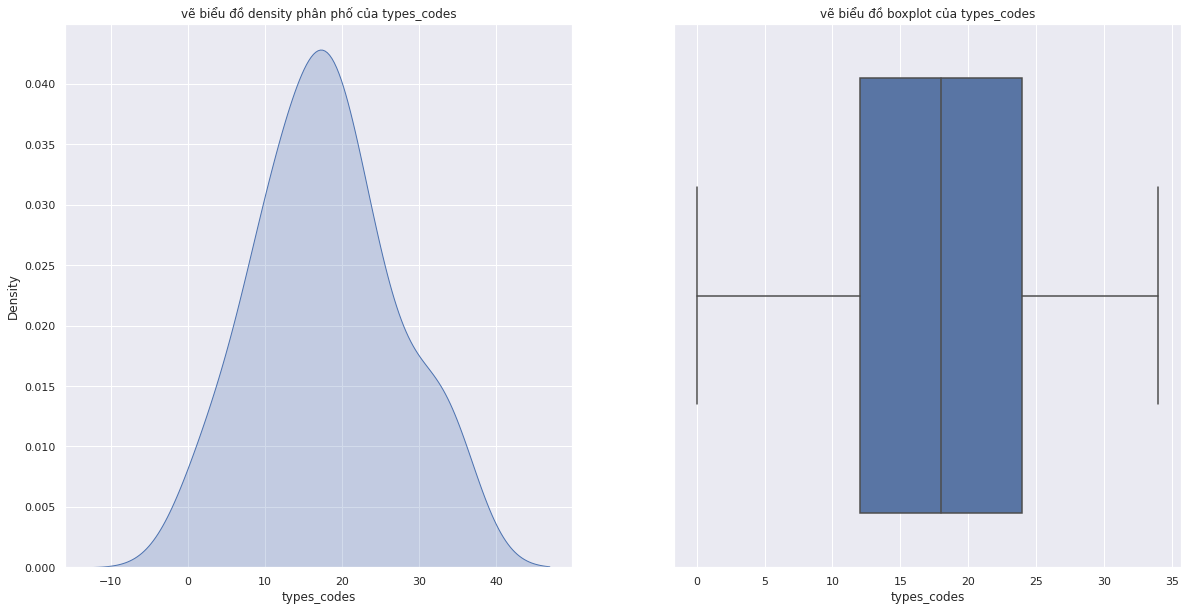

In [274]:

plt.figure(figsize = (20,10))

plt.subplot(1, 2, 1)
plt.title('vẽ biểu đồ density phân phố của types_codes')
sns.kdeplot(dataTrain1['types_codes'] , bw = 0.5 , fill = True)
plt.subplot(1, 2, 2)
plt.title('vẽ biểu đồ boxplot của types_codes')
sns.boxplot(x=dataTrain1['types_codes'])
plt.show()

In [275]:
dataTrain1.loc[dataTrain1['types_codes'] <0, :]

,types_codes,skill_cut_codes,City_codes,District_codes,experienceSub_codes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


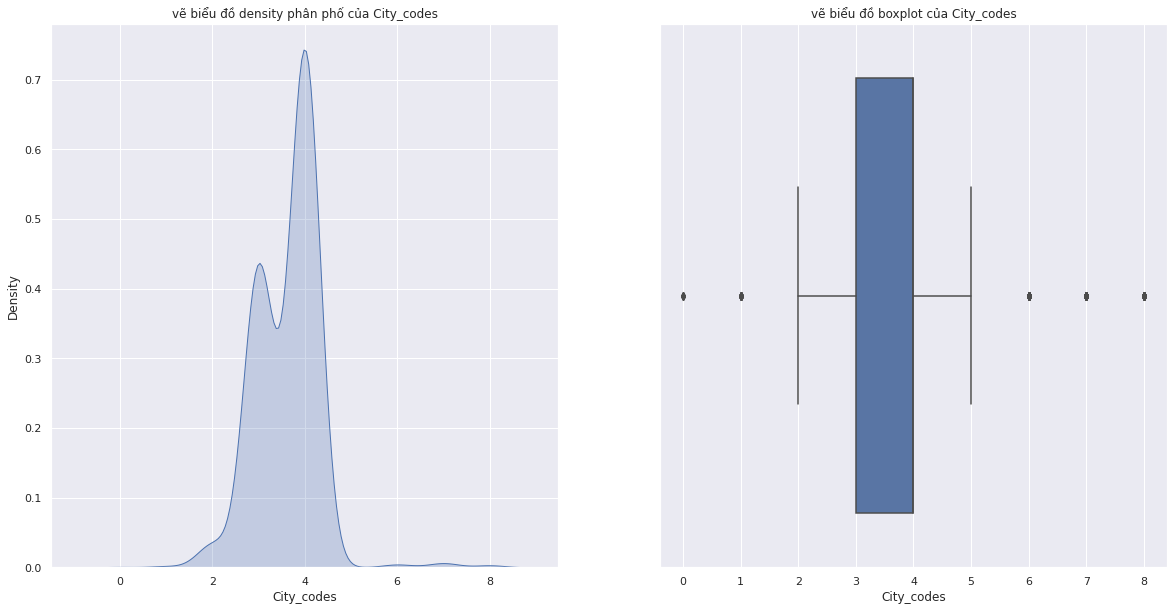

In [276]:

plt.figure(figsize = (20,10))

plt.subplot(1, 2, 1)
plt.title('vẽ biểu đồ density phân phố của City_codes')
sns.kdeplot(dataTrain1['City_codes'] , bw = 0.5 , fill = True)
plt.subplot(1, 2, 2)
plt.title('vẽ biểu đồ boxplot của City_codes')
sns.boxplot(x=dataTrain1['City_codes'])
plt.show()

In [277]:
dataTrain1 = dataTrain1.loc[dataTrain1['City_codes'] < 4, :]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


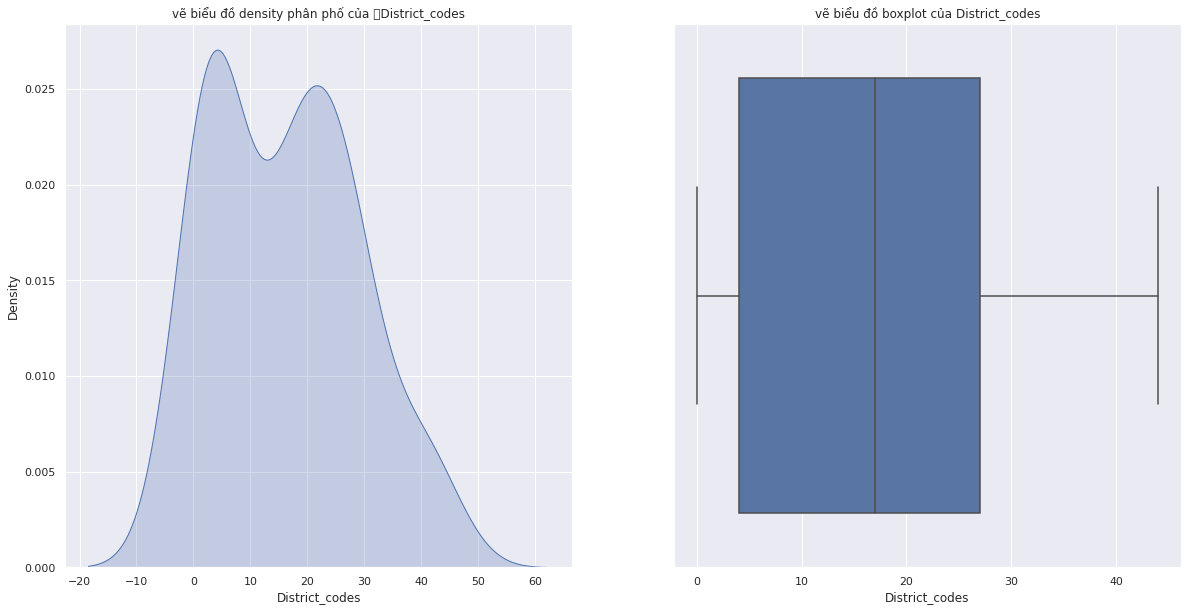

In [278]:

plt.figure(figsize = (20,10))

plt.subplot(1, 2, 1)
plt.title('vẽ biểu đồ density phân phố của 	District_codes')
sns.kdeplot(dataTrain1['District_codes'] , bw = 0.5 , fill = True)
plt.subplot(1, 2, 2)
plt.title('vẽ biểu đồ boxplot của District_codes')
sns.boxplot(x=dataTrain1['District_codes'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


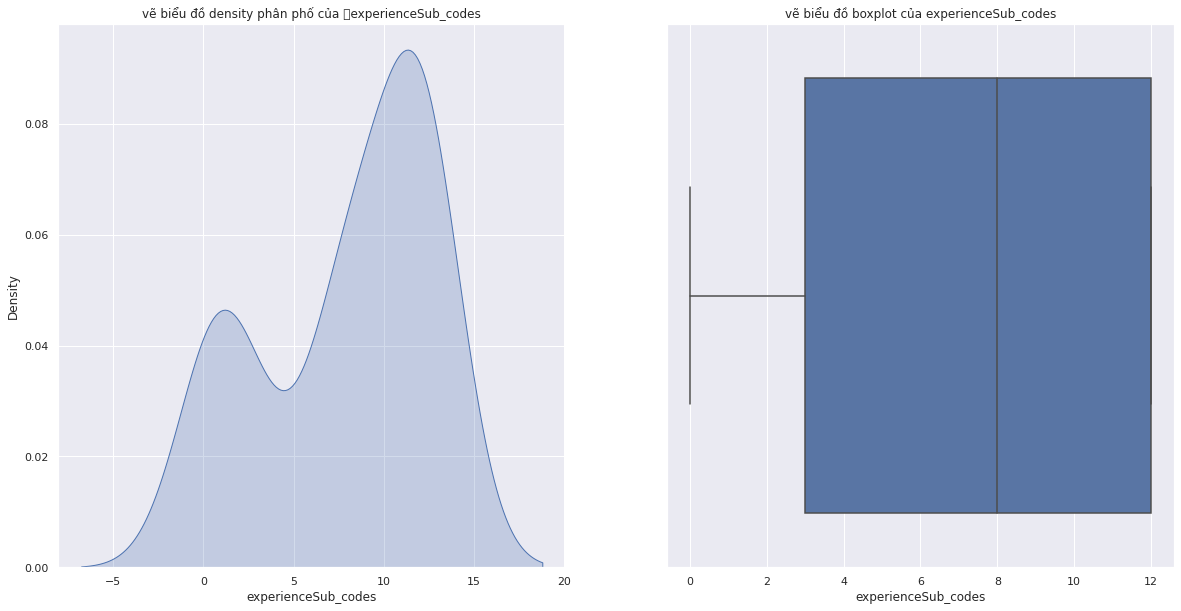

In [279]:

plt.figure(figsize = (20,10))

plt.subplot(1, 2, 1)
plt.title('vẽ biểu đồ density phân phố của 	experienceSub_codes')
sns.kdeplot(dataTrain1['experienceSub_codes'] , bw = 0.5 , fill = True)
plt.subplot(1, 2, 2)
plt.title('vẽ biểu đồ boxplot của experienceSub_codes')
sns.boxplot(x=dataTrain1['experienceSub_codes'])
plt.show()

In [280]:
dataTrain1['experienceSub_codes'].unique()

array([ 1,  8,  6,  5,  0,  3, 12,  7, 10], dtype=int8)

# Train and test split

In [281]:
X = dataTrain1.drop('types_codes', axis = 1)
y = dataTrain1['types_codes']

In [282]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape )

(3849, 4) (963, 4) (3849,) (963,)


#### 1. Classification.

In [283]:
# tạo obj để phân loại cây quyết định
clf = DecisionTreeClassifier()

# đào tạo lớp phân loại
clf = clf.fit(X_train,y_train)

#sử dụng bộ test để dự đoán
y_pred = clf.predict(X_test)

In [284]:
# Model Accuracy, how often is the classifier correct?
decision = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", decision)

Accuracy: 0.735202492211838


### 2. logisticRegression.

In [285]:
from sklearn.linear_model import LogisticRegression

In [286]:
modelLg = LogisticRegression()

modelLg.fit(X_train,y_train)

predLg = modelLg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [287]:
lg =metrics.accuracy_score(y_test, predLg)
print("Accuracy:", lg)

Accuracy: 0.3011422637590862


### 3. Support Vector Machines

In [288]:
from sklearn import svm

In [289]:
model_svm = svm.SVC()

model_svm.fit(X_train,y_train)

pred_svm = model_svm.predict(X_test)

In [290]:
# Model Accuracy
svm = metrics.accuracy_score(y_test, pred_svm)
print("Accuracy:", svm)

Accuracy: 0.3354101765316719


### 4. KNN

In [291]:
from sklearn.neighbors import KNeighborsClassifier


In [292]:
# xây dựng mô hình knn sử dụng tham số neighbor để lấy các điểm lân cận gần nhất
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.7479864899974019, 2: 0.7318784099766174, 3: 0.7708495713172252, 4: 0.7555209145232528, 5: 0.7448687970901533, 6: 0.7292803325539101, 7: 0.7123928293063133, 8: 0.6892699402442193, 9: 0.6773187840997662, 10: 0.6612107040789815, 11: 0.6521174330995063, 12: 0.6370485840478046} 
 {1: 0.6915887850467289, 2: 0.6479750778816199, 3: 0.6490134994807892, 4: 0.6458982346832814, 5: 0.6438213914849429, 6: 0.6251298026998962, 7: 0.5991692627206646, 8: 0.5804776739356179, 9: 0.5617860851505712, 10: 0.5586708203530634, 11: 0.5451713395638629, 12: 0.5285565939771547}


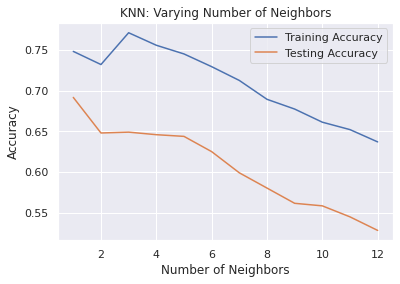

In [293]:

plt.title("KNN: Varying Number of Neighbors")

# vẽ đường train accuracies
plt.plot(list(neighbors), list(train_accuracies.values()), label="Training Accuracy")

# vex đường test accuracies
plt.plot(list(neighbors), list(test_accuracies.values()), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# hiển thị biểu đồ
plt.show()

Nhìn vào biểu đồ ta thấy ở number of neighbors = 3 có Accuracy tốt nhất. Vì vậy tham số truyền vào sẽ là 3

In [294]:
# Set up a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

predKnn = knn.predict(X_test)

In [295]:
# Model Accuracy, how often is the classifier correct?
knn = metrics.accuracy_score(y_test, predKnn)
print("Accuracy:",knn)

Accuracy: 0.6490134994807892


### 5. ANN

In [296]:
from sklearn.neural_network import MLPClassifier

In [297]:
modelAnn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [298]:
modelAnn.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [299]:
predAnn = modelAnn.predict(X_test)

In [300]:
# Model Accuracy, how often is the classifier correct?
ann = metrics.accuracy_score(y_test, predAnn)
print("Accuracy:",ann)

Accuracy: 0.31360332294911736


# Vẽ mô hình dự đoán

In [301]:
valuePredict = [decision, lg, svm, knn, ann]
label = ['Decision Tree', 'Logistics regression', 'SVM', 'KNN', 'ANN']

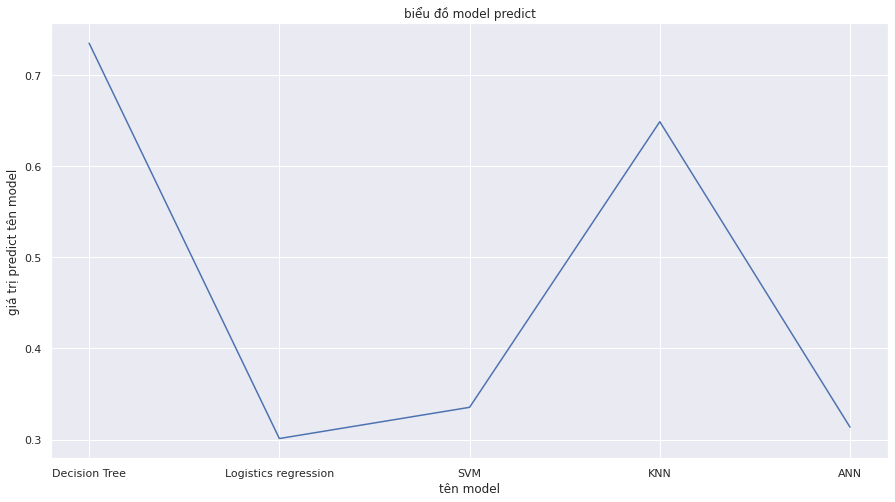

In [302]:
fig = plt.figure(figsize = (15,8))
plt.title("biểu đồ model predict")
sns.lineplot(x = label, y = valuePredict)
plt.ylabel("giá trị predict tên model")
plt.xlabel("tên model")
plt.show()

Dựa vào biểu đồ ta nhận thấy có Decision Tree có độ chính xác cao nhất